In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#Import these to try out the Pandas profiling tool
from pathlib import Path
import requests
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

from scipy.stats import linregress
import statsmodels.formula.api as smf

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [66]:
print(pandas_profiling.__version__)

2.10.0


# Mental Health in Tech Industry <a id='Exploratory_Data_Analysis'></a>
source Data Set Location: https://www.kaggle.com/osmi/mental-health-in-tech-survey 

In [67]:
#Read in the data from local CSV
survey_data = pd.read_csv(r'C:\Users\mkhan74\Documents\Mental Health\survey.csv')

In [68]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [69]:
survey_data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [70]:
survey_data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [71]:
survey_data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [72]:
#Use the Pandas profingling tool from the exercise. This fails due to memory error but after dropping columns it comes back moving down range.
#Question how to del with memory issues when the data is too big in the notebook?
#report = survey_data.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False,minimal=True)
#report

In [73]:
print(survey_data['Gender'].value_counts())
print(type(survey_data))

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Female                                              2
Cis Male                                            2
Female (trans)                                      2
Man                                                 2
All                                                 1
p                                                   1
Female (cis)                                        1
Nah                         

In [74]:
#survey_data['Gender'] = survey_data['Gender'].str.strip()
#survey_data['Gender'] = survey_data['Gender'].str.upper()
mapping = {'Male': 'M',
           'male': 'M',
           'Make': 'M',
           'Man' :  'M',
           'Cis Male': 'M',
           'something kinda male?': 'M',
           'Mal' :  'M',
           'cis male': 'M',
           'maile':'M',
           'Male' :'M',
           '(CIS)':'M',
           'Cis Man': 'M',
           'Mail': 'M',
           'ostensibly male, unsure what that really means': 'M',
           'msle': 'M',
           'male leaning androgynous': 'M',
           'Male-ish': 'M',
           'Malr': 'M',
           'Guy (-ish) ^_^': 'M',
           'Female': 'F',
           'female': 'F',
           'Woman': 'F',
           'Female':'F',
           'Trans-female': 'F',
           'Female (trans)': 'F',
           'cis-female/femme': 'F',
           'woman': 'F',
           'Cis Female': 'F',
           'Female (cis)': 'F',
           'Femake': 'F',
           'Trans woman': 'F',
           'femail': 'F',
           'fluid': 'T',
           'Genderqueer': 'T',
           'queer/she/they': 'T',
           'non-binary': 'T',
           'All': 'T',
           'Agender': 'T',
           'Androgyne': 'T',
           'Neuter': 'T',
           'queer': 'T',
           'Enby': 'T',
           'A little about you': 'T',
           'Nah': 'T',
           'p': 'T',
           'm': 'M',
           'f': 'F',
           'Male (CIS)': 'M',
           'Female ': 'M',
           'Male ': 'M'
            }
survey_data['Gender'] = survey_data['Gender'].replace(mapping)
survey_data['Gender']

0       F
1       M
2       M
3       M
4       M
       ..
1254    M
1255    M
1256    M
1257    F
1258    M
Name: Gender, Length: 1259, dtype: object

In [75]:
#print(survey_data['Age'].value_counts())
#print(type(survey_data))

In [76]:
survey_data = survey_data[survey_data.Age > 18]
survey_data = survey_data[survey_data.Age < 65]

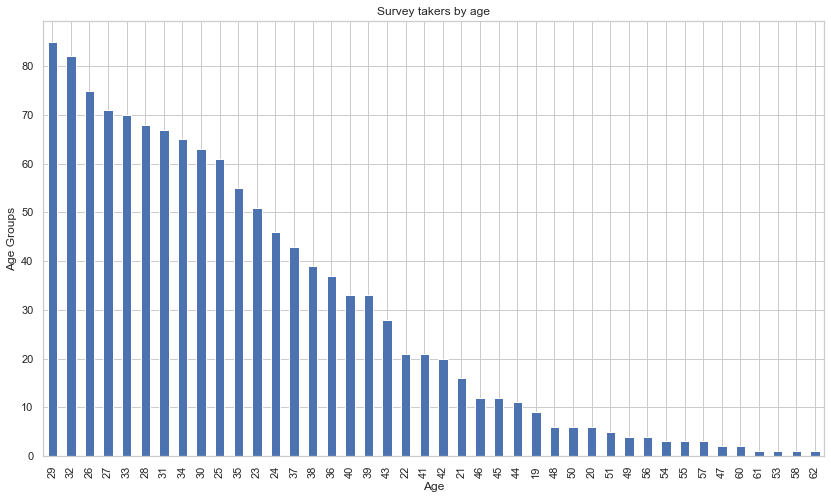

In [77]:
survey_data['Age'].value_counts().plot(kind='bar',figsize=(14,8))
plt.title('Survey takers by age')
plt.ylabel('Age Groups')
plt.xlabel('Age')
plt.show()

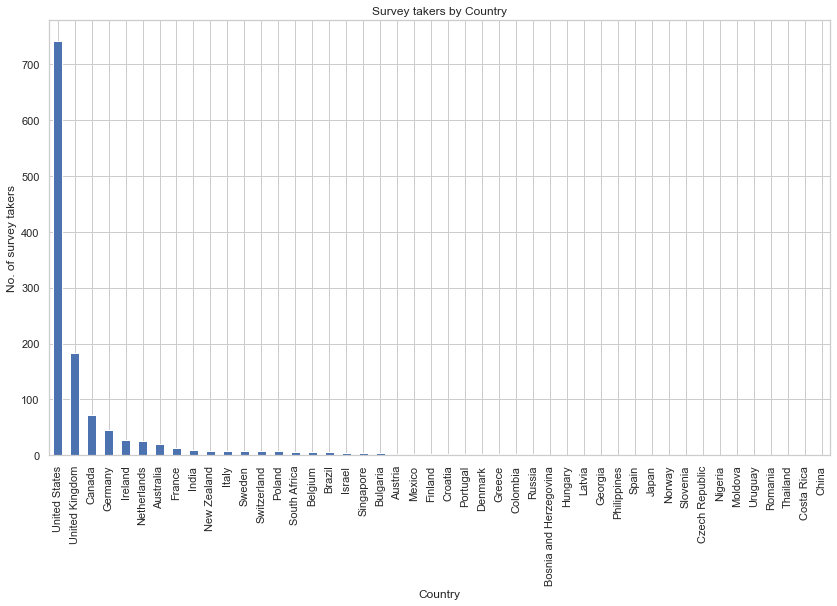

In [78]:
survey_data['Country'].value_counts().plot(kind='bar',figsize=(14,8));
plt.title('Survey takers by Country')
plt.ylabel('No. of survey takers')
plt.xlabel('Country')
plt.show()

#print(survey_data['family_history'].value_counts())
survey_data.Gender = survey_data.Gender.replace(1, 'Yes')
survey_data.Gender = survey_data.Gender.replace(0, 'No')
print(survey_data['family_history'].value_counts())

In [79]:
print(survey_data.columns)

survey_data.drop('Timestamp',axis=1,inplace=True)
survey_data.drop('self_employed',axis=1,inplace=True)
survey_data.drop('state',axis=1,inplace=True)
survey_data.drop('comments',axis=1,inplace=True)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [80]:
survey_data.head()

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,F,United States,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,M,Canada,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,M,United Kingdom,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,M,United States,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [81]:
#Run the profiler here
report = survey_data.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

In [82]:
#print(survey_data.columns)
print(survey_data['work_interfere'].value_counts())
survey_data['work_interfere'].isnull()

Sometimes    462
Never        210
Rarely       172
Often        139
Name: work_interfere, dtype: int64


0       False
1       False
2       False
3       False
4       False
        ...  
1254     True
1255    False
1256    False
1257     True
1258    False
Name: work_interfere, Length: 1242, dtype: bool

<AxesSubplot:xlabel='Age', ylabel='seek_help'>

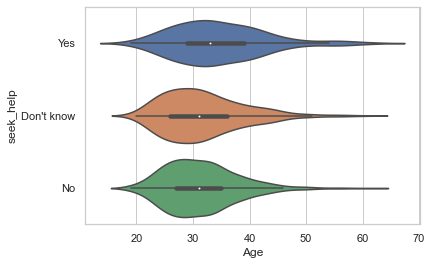

In [83]:
#following sample form Geeks for Geek https://www.geeksforgeeks.org/violinplot-using-seaborn-in-python/
#ValueError: 'survey_data' is not one of the example datasets.
sns.set(style = 'whitegrid')  
#survey_data = sns.load_dataset("survey_data")  
     
sns.violinplot(x ="Age",  
             y ="seek_help",  
             data = survey_data)

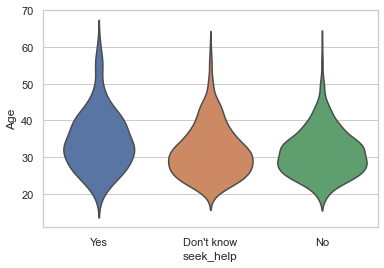

In [84]:
#from chapter 3
survey_data = survey_data.dropna(subset=['seek_help','Age'])
sns.violinplot(x='seek_help', y='Age', data=survey_data, inner=None)
plt.show()

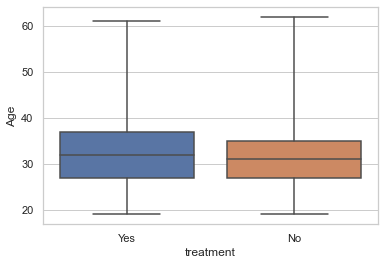

In [85]:
sns.boxplot(x='treatment', y='Age', data=survey_data, whis=10)
plt.show()

In [86]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1242 non-null   int64 
 1   Gender                     1242 non-null   object
 2   Country                    1242 non-null   object
 3   family_history             1242 non-null   object
 4   treatment                  1242 non-null   object
 5   work_interfere             983 non-null    object
 6   no_employees               1242 non-null   object
 7   remote_work                1242 non-null   object
 8   tech_company               1242 non-null   object
 9   benefits                   1242 non-null   object
 10  care_options               1242 non-null   object
 11  wellness_program           1242 non-null   object
 12  seek_help                  1242 non-null   object
 13  anonymity                  1242 non-null   object
 14  leave   

In [87]:
print(survey_data['seek_help'].value_counts())
print(survey_data['obs_consequence'].value_counts())

No            637
Don't know    359
Yes           246
Name: seek_help, dtype: int64
No     1062
Yes     180
Name: obs_consequence, dtype: int64


In [88]:
print(survey_data['supervisor'].value_counts())

Yes             510
No              386
Some of them    346
Name: supervisor, dtype: int64


In [89]:
#drop all the nas from the dataframe
survey_data = survey_data.dropna()

In [90]:
survey_data.shape

(983, 23)

In [91]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
#https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

In [92]:
le = LabelEncoder() 

survey_data['Age']  = le.fit_transform(survey_data['Age'])                     
survey_data['Gender']  = le.fit_transform(survey_data['Gender'])                   
survey_data['Country']  = le.fit_transform(survey_data['Country'])                 
survey_data['family_history'] = le.fit_transform(survey_data['family_history'])            
survey_data['treatment']   = le.fit_transform(survey_data['treatment'])               
survey_data['work_interfere'] = le.fit_transform(survey_data['work_interfere']) 
survey_data['no_employees'] = le.fit_transform(survey_data['no_employees'])          
survey_data['remote_work']  = le.fit_transform(survey_data['remote_work']) 
survey_data['tech_company'] = le.fit_transform(survey_data['tech_company']) 
survey_data['benefits']     = le.fit_transform(survey_data['benefits']) 
survey_data['care_options'] = le.fit_transform(survey_data['care_options']) 
survey_data['wellness_program'] = le.fit_transform(survey_data['wellness_program']) 
survey_data['seek_help'] = le.fit_transform(survey_data['seek_help']) 
survey_data['anonymity'] = le.fit_transform(survey_data['anonymity']) 
survey_data['leave'] = le.fit_transform(survey_data['leave']) 
survey_data['mental_health_consequence'] = le.fit_transform(survey_data['mental_health_consequence']) 
survey_data['phys_health_consequence'] = le.fit_transform(survey_data['phys_health_consequence']) 
survey_data['coworkers'] = le.fit_transform(survey_data['coworkers']) 
survey_data['supervisor'] = le.fit_transform(survey_data['supervisor']) 
survey_data['mental_health_interview'] = le.fit_transform(survey_data['mental_health_interview']) 
survey_data['phys_health_interview'] = le.fit_transform(survey_data['phys_health_interview']) 
survey_data['mental_vs_physical'] = le.fit_transform(survey_data['mental_vs_physical'])   
#survey_data['obs_consequence'] = le.fit_transform(survey_data['obs_consequence'])

In [93]:
survey_data.head()

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,18,0,37,0,1,1,4,0,1,2,...,2,2,1,1,1,2,1,0,2,No
1,25,1,37,0,0,2,5,0,0,0,...,0,0,0,1,0,0,1,1,0,No
2,13,1,6,0,0,2,4,0,1,1,...,0,1,1,1,2,2,2,2,1,No
3,12,1,36,1,1,1,2,0,1,1,...,1,1,2,2,1,0,0,0,1,Yes
4,12,1,37,0,0,0,1,1,1,2,...,0,0,1,1,1,2,2,2,0,No


In [94]:
#print(survey_data['obs_consequence'].value_counts())
list(survey_data.columns)

['Age',
 'Gender',
 'Country',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

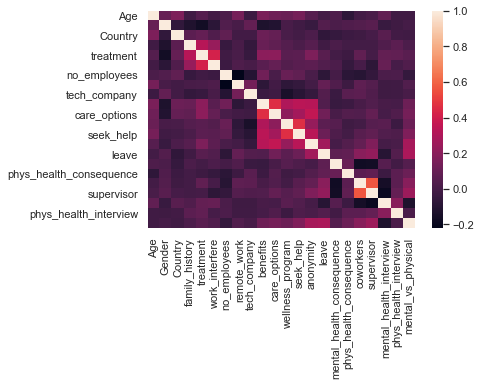

In [95]:
sns.heatmap(survey_data.corr())
plt.show()

In [96]:
survey_data.shape

(983, 23)

In [97]:
survey_data.head()

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,18,0,37,0,1,1,4,0,1,2,...,2,2,1,1,1,2,1,0,2,No
1,25,1,37,0,0,2,5,0,0,0,...,0,0,0,1,0,0,1,1,0,No
2,13,1,6,0,0,2,4,0,1,1,...,0,1,1,1,2,2,2,2,1,No
3,12,1,36,1,1,1,2,0,1,1,...,1,1,2,2,1,0,0,0,1,Yes
4,12,1,37,0,0,0,1,1,1,2,...,0,0,1,1,1,2,2,2,0,No


In [98]:
survey_data.obs_consequence = survey_data.obs_consequence.replace('No', 0) 
survey_data.obs_consequence = survey_data.obs_consequence.replace('Yes', 1) 

In [99]:
#https://datascienceplus.com/building-a-logistic-regression-in-python-step-by-step/
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
X = survey_data.iloc[:,0:21]
y = survey_data.iloc[:,22]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [100]:
X_train.shape

(737, 21)

In [101]:
X_test.shape

(246, 21)

In [110]:
#classifier = LogisticRegression(random_state=0)
classifier  = LogisticRegression(class_weight='balanced',max_iter=300)
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=300)

In [111]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[125  84]
 [ 15  22]]


In [104]:
survey_data

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,18,0,37,0,1,1,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,25,1,37,0,0,2,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,13,1,6,0,0,2,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,12,1,36,1,1,1,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,12,1,37,0,0,0,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,10,1,37,1,1,3,1,1,1,2,...,2,0,2,1,1,0,1,0,1,0
1253,17,1,37,1,0,2,5,0,0,0,...,0,2,0,0,1,1,1,1,0,0
1255,13,1,37,1,1,1,2,1,1,2,...,2,1,1,1,1,2,1,1,2,0
1256,15,1,37,1,1,3,5,0,1,2,...,0,1,2,2,0,0,1,1,1,0


In [112]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60


In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.60      0.72       209
           1       0.21      0.59      0.31        37

    accuracy                           0.60       246
   macro avg       0.55      0.60      0.51       246
weighted avg       0.79      0.60      0.65       246



Accuracy of logistic regression 0.7967479674796748
AUC: 0.61


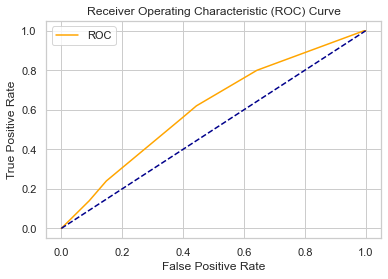

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


X = survey_data.loc[:,['supervisor', 'Gender']].values
y = survey_data.loc[:,'obs_consequence'].values

#can i add more variable here I want to add supervisor and Gender to see if they have consequencyes 
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X,y,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print('Accuracy of logistic regression',accuracy_score(clf.predict(Xtestlr), ytestlr))

probs = clf.predict_proba(Xtestlr)
probs = probs[:,1]
auc = roc_auc_score(ytestlr, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(ytestlr, probs)
plot_roc_curve(fpr, tpr)

